In [1]:
import torch
from torch.utils.data import DataLoader
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from final_model_log_scale import WAE, AudioDataset

In [2]:
torch.nn.Module.dump_patches = False

model,log = torch.load("../pretrained/uku_guitare_3700_e.pt", map_location="cpu")
model.eval()

motu_dataset = AudioDataset("/home/antoine/Musique/enregistrement_cordes/export/motu_dataset/*.wav", slice_size=128, process=0)
motu = DataLoader(motu_dataset, shuffle=False, batch_size=400, drop_last=False)
print("Done!")

Done!


/home/antoine/lap/lib/python3.6/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'final_model_log_scale.WAE' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [3]:
data = next(iter(motu))

In [4]:
z = model.encode(data[0])

AttributeError: 'WAE' object has no attribute 'lin3_mean'

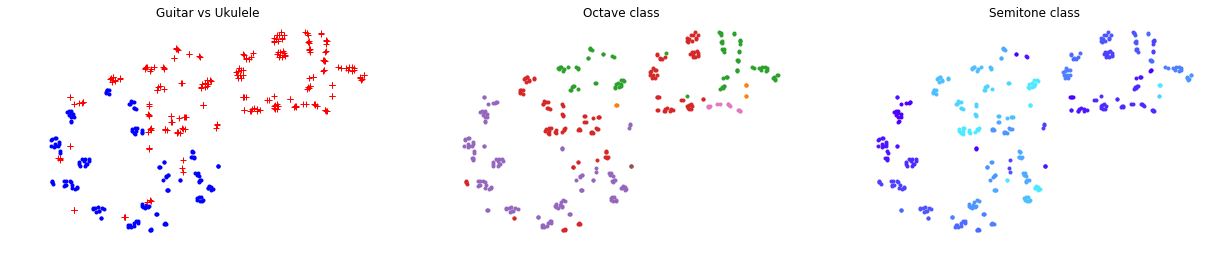

In [117]:
z_ = torch.cat([z,data[1], data[2]], 1).detach().cpu().numpy()
z_emb = TSNE(n_components=2).fit_transform(z_)

plt.figure(figsize=(21,4))
plt.subplot(131)

for i in range(z_emb.shape[0]):
    plt.plot(z_emb[i,0], z_emb[i,1], "r+" if "guitare" in motu_dataset.liste[i] else "b.")

plt.axis("off")
plt.title("Guitar vs Ukulele")
plt.subplot(132)


for i in range(z_emb.shape[0]):
    plt.plot(z_emb[i,0], z_emb[i,1], "C{}.".format(np.argmin(abs(data[1][i].detach().cpu().numpy()-1))))

plt.axis("off")
plt.title("Octave class")
plt.subplot(133)


for i in range(z_emb.shape[0]):
    plt.plot(z_emb[i,0], z_emb[i,1], '.', color=(.3,np.argmin(abs(data[2][i].detach().cpu().numpy()-1))/12., 1))

plt.axis("off")
plt.title("Semitone class")

plt.savefig("tsne_latent_space_guitare_uku.eps")
plt.show()

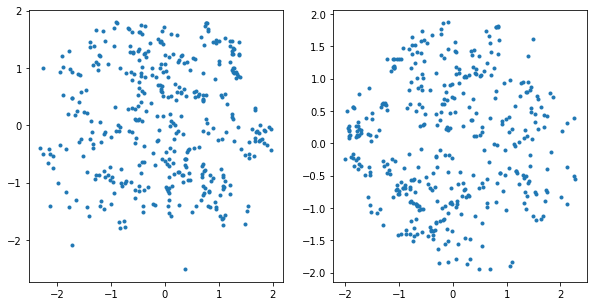

In [121]:
z_ = z.detach().cpu().numpy()
z_.shape

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(z_[:,0], z_[:,1], ".")
plt.subplot(122)
plt.plot(z_[:,2], z_[:,3], ".")